# TİTANİC VERİ ANALİZİ

## Gerekli Kütüphanlerin Kurulumu & Veri Seti Yükleme İşlemleri

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
Titanic = sns.load_dataset("titanic")
df = Titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## İlk Gözlem Ve İncelemeler

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [3]:
df.isnull().sum() # Ne kadar eksik NaN verisi olduğunu gösteriri

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Veri Temizliği Eksik Verileri Doldurma 

In [4]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])
df.drop(columns=['deck'], inplace=True)  # Çok eksik varsa çıkar

In [5]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## Keşifsel Veri Analizi

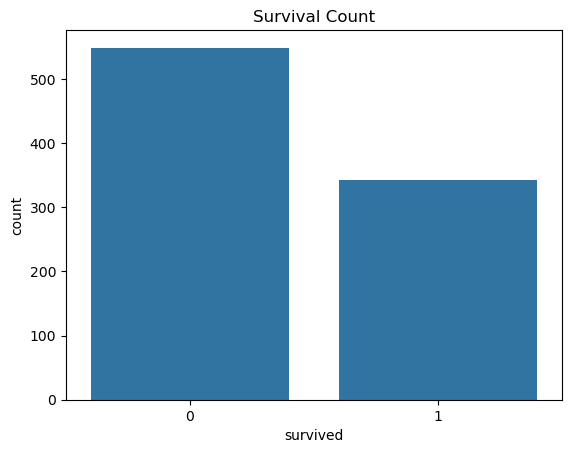

In [7]:
# Grafiksel Şekilde Hayatta Kalma Oranına Bakıyoruz
sns.countplot(data = df , x = "survived");
plt.title("Survival Count")
plt.show()

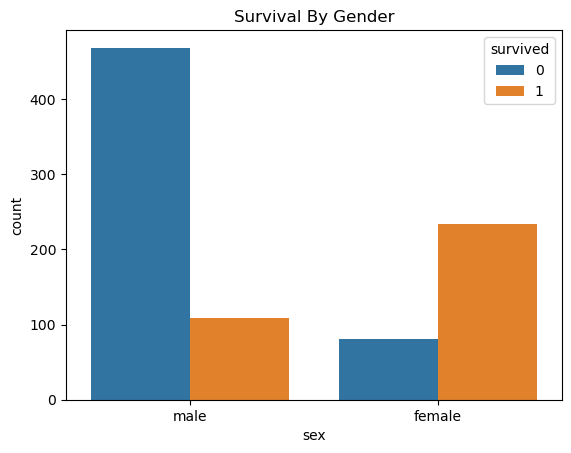

In [8]:
# Cinsiyete Göre Hayatta Kalma Oranı
sns.countplot(x = "sex", hue = "survived", data = df)
plt.title("Survival By Gender")
plt.show()

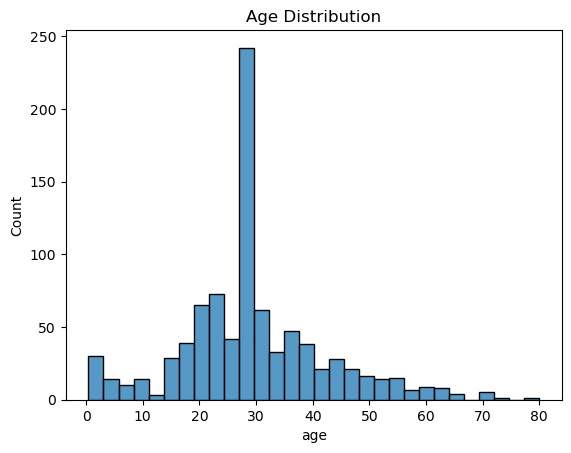

In [41]:
# Yaş Dağlımını İnceledik
sns.histplot(x = "age", bins = 30 , kde = False , data = df);
plt.title("Age Distribution")
plt.show()

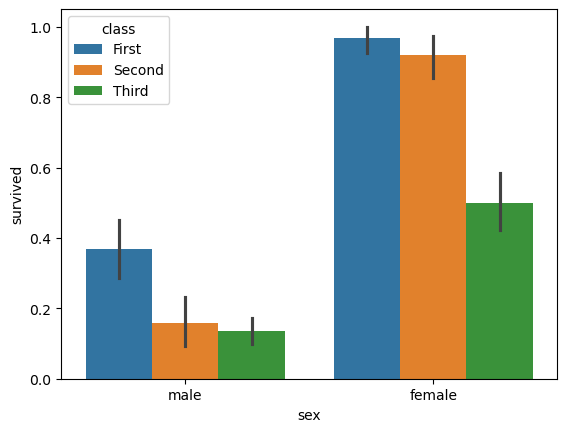

In [11]:
sns.barplot(x = "sex", y = "survived", hue = "class", data = df);

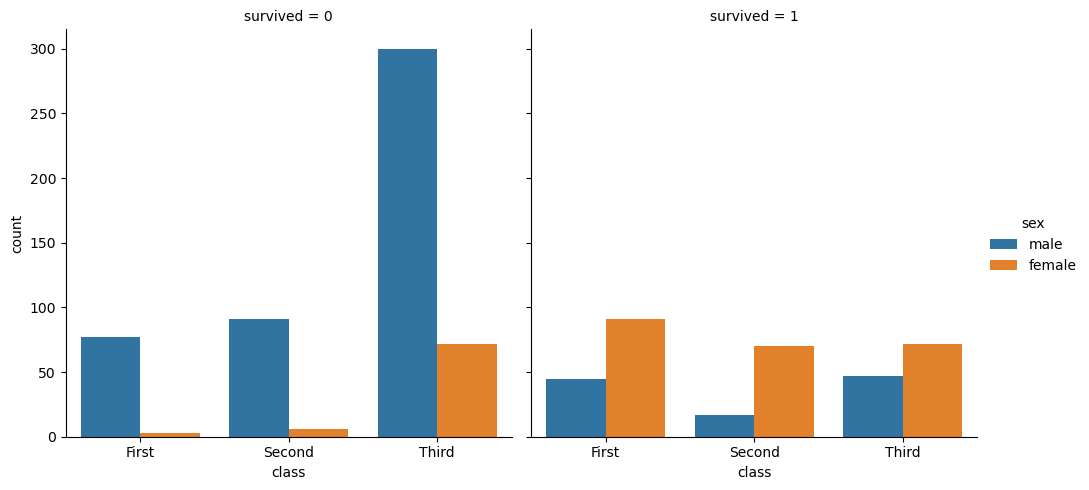

In [74]:
# Sınıflara Göre Cinsiyetlerin Hayatta Kalma Durumları
sns.catplot(x = "class", hue= "sex", col = "survived", kind = "count" , data =df);

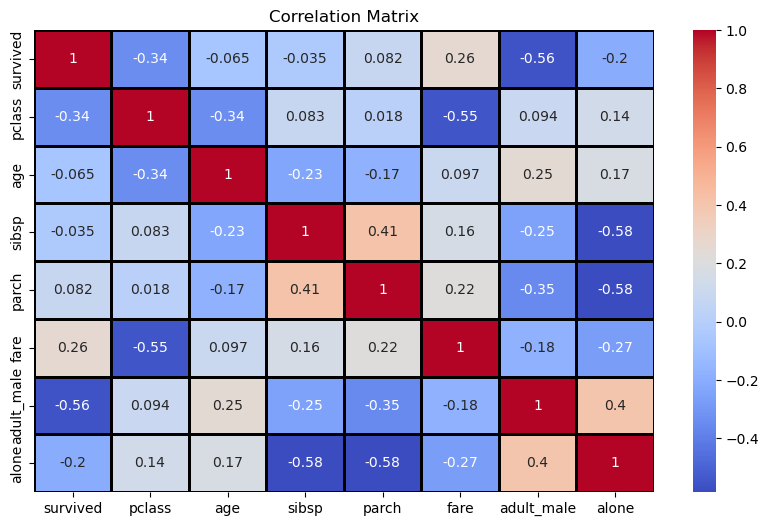

In [73]:
# Korelasyon Isı Haritası (Maviden Kırmızıya doğru risk artıyor )
plt.figure(figsize =(10,6))
sns.heatmap(df.corr(numeric_only = True), 
            annot = True , 
            cmap = "coolwarm",
            linewidths= (1),
            linecolor= "black")
plt.title("Correlation Matrix")
plt.show()

# Titanic Veri Seti İçin Elde Ettiğimiz Bilgiler:
 * Kadınların hayatta kalma sayısı erkeklerden daha fazla 
 * Gemide bulunanları çoğunlğu 20 ile 30 yaş aralığında olduğunu biliyoruz 
 * First Classda bulunan insanların yaşama oranı diğer classlara göre daha fazla 

# Titanic Survival Analysis 🛳

This notebook analyzes the Titanic dataset to discover patterns behind passenger survival. It covers data cleaning, exploration, and visual analytics.

## Main Findings
- Females had higher survival rates.
- 1st class passengers were more likely to survive.
- Age played a role in survival probability.

## Libraries
- Pandas
- Seaborn